# Daily Climate

[Deskripsi]

EXP : At this notebook, we will analyze the Nvidia stock data. We will use the data from kaggle dataset [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data) to analyze the stock data. We will use the data all data from 2018 - 2024 to analyze the stock data.

# Download and Import Dataset

We will download the dataset from kaggle and import the dataset to the notebook using kagglehub.

In [64]:
import kagglehub
import os
import shutil

path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data", force_download=True)

final_path = os.path.join(os.getcwd(), "data")
os.makedirs(final_path, exist_ok=True)
print(f"Data downloaded to {path}")

if path != final_path:
    print("Moving data to final path")
    for file_name in os.listdir(path):
        print(f"Moving {file_name} to {final_path}")
        source = os.path.join(path, file_name)
        destination = os.path.join(final_path, file_name)
        shutil.move(source, destination)

print(f"Data moved to {final_path}")


100%|██████████| 22.0k/22.0k [00:00<00:00, 613kB/s]

Extracting files...
Data downloaded to C:\Users\thari\.cache\kagglehub\datasets\sumanthvrao\daily-climate-time-series-data\versions\3
Moving data to final path
Moving DailyDelhiClimateTest.csv to e:\Cool Yeah\data-science\Dailty Climate\data
Moving DailyDelhiClimateTrain.csv to e:\Cool Yeah\data-science\Dailty Climate\data
Data moved to e:\Cool Yeah\data-science\Dailty Climate\data


In [65]:
import pandas as pd


test = pd.read_csv("data/DailyDelhiClimateTest.csv")
train = pd.read_csv("data/DailyDelhiClimateTrain.csv")

In [66]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [67]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [68]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


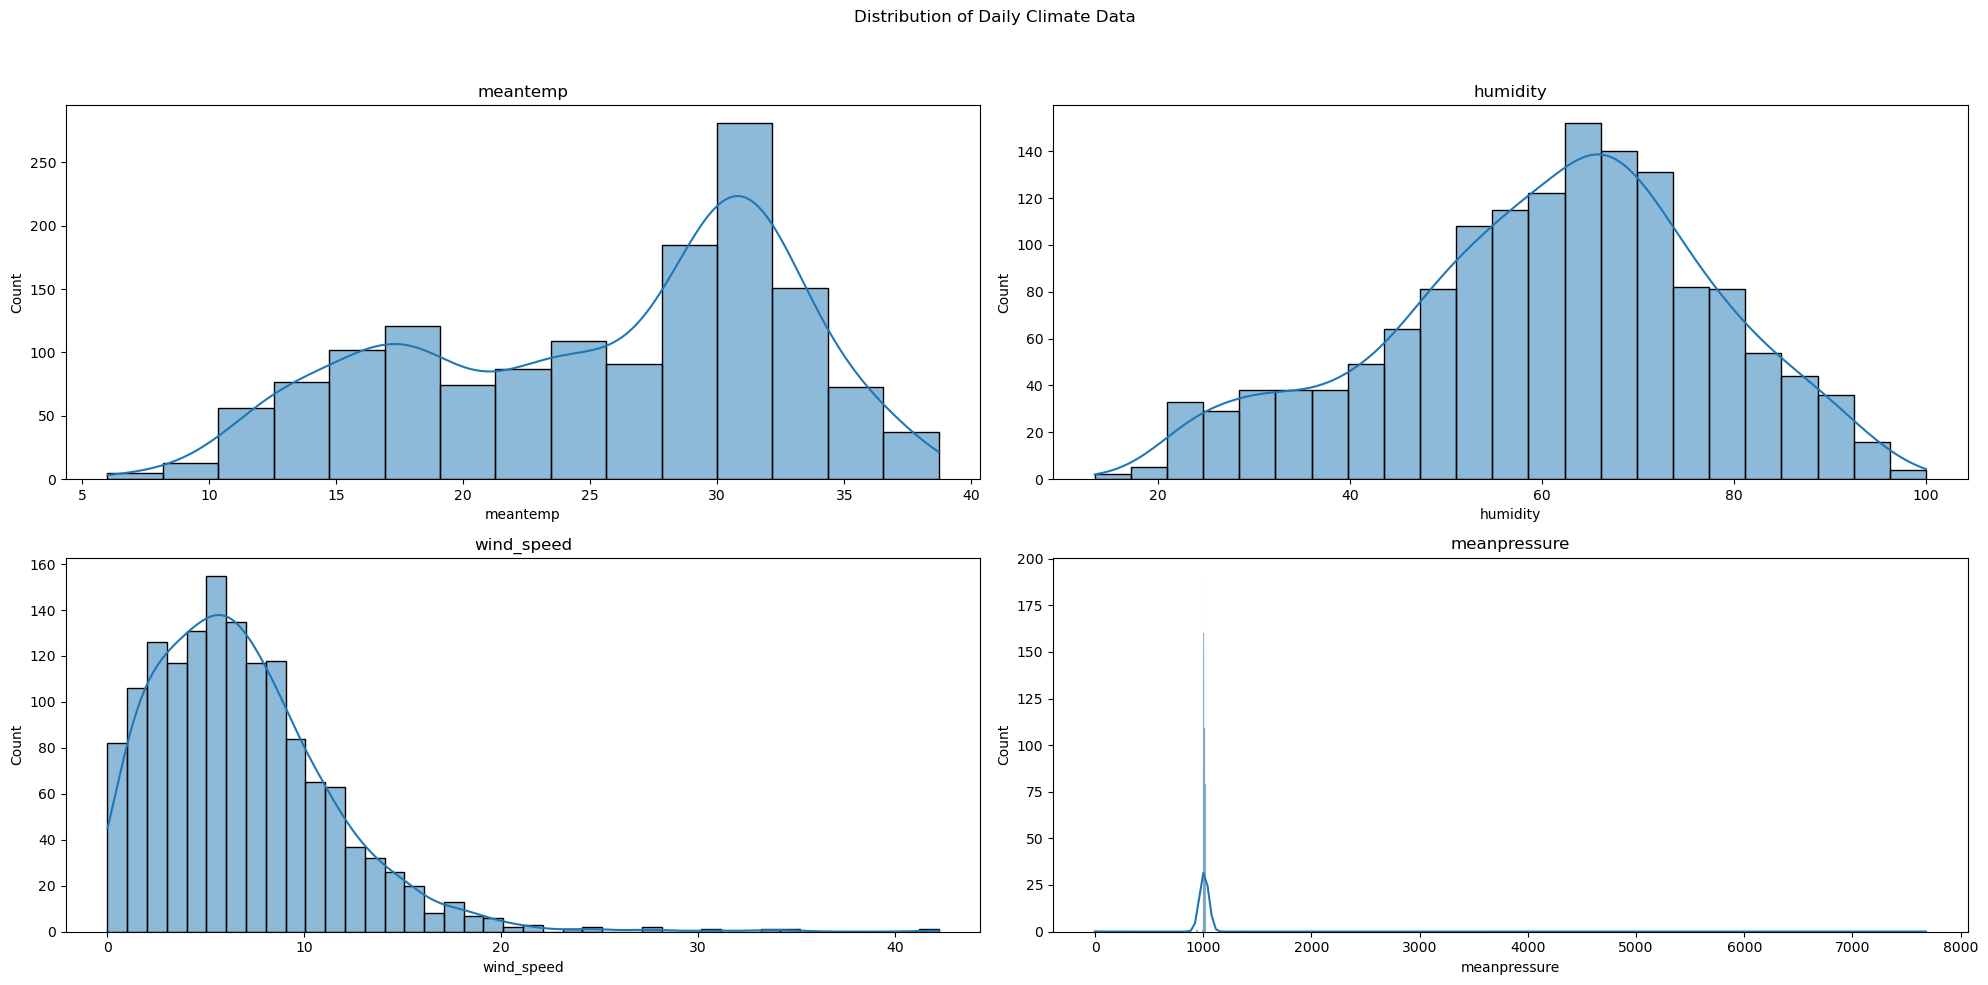

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Distribution of Daily Climate Data')

columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for ax, col in zip(axes.flat, columns):
    sns.histplot(train[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


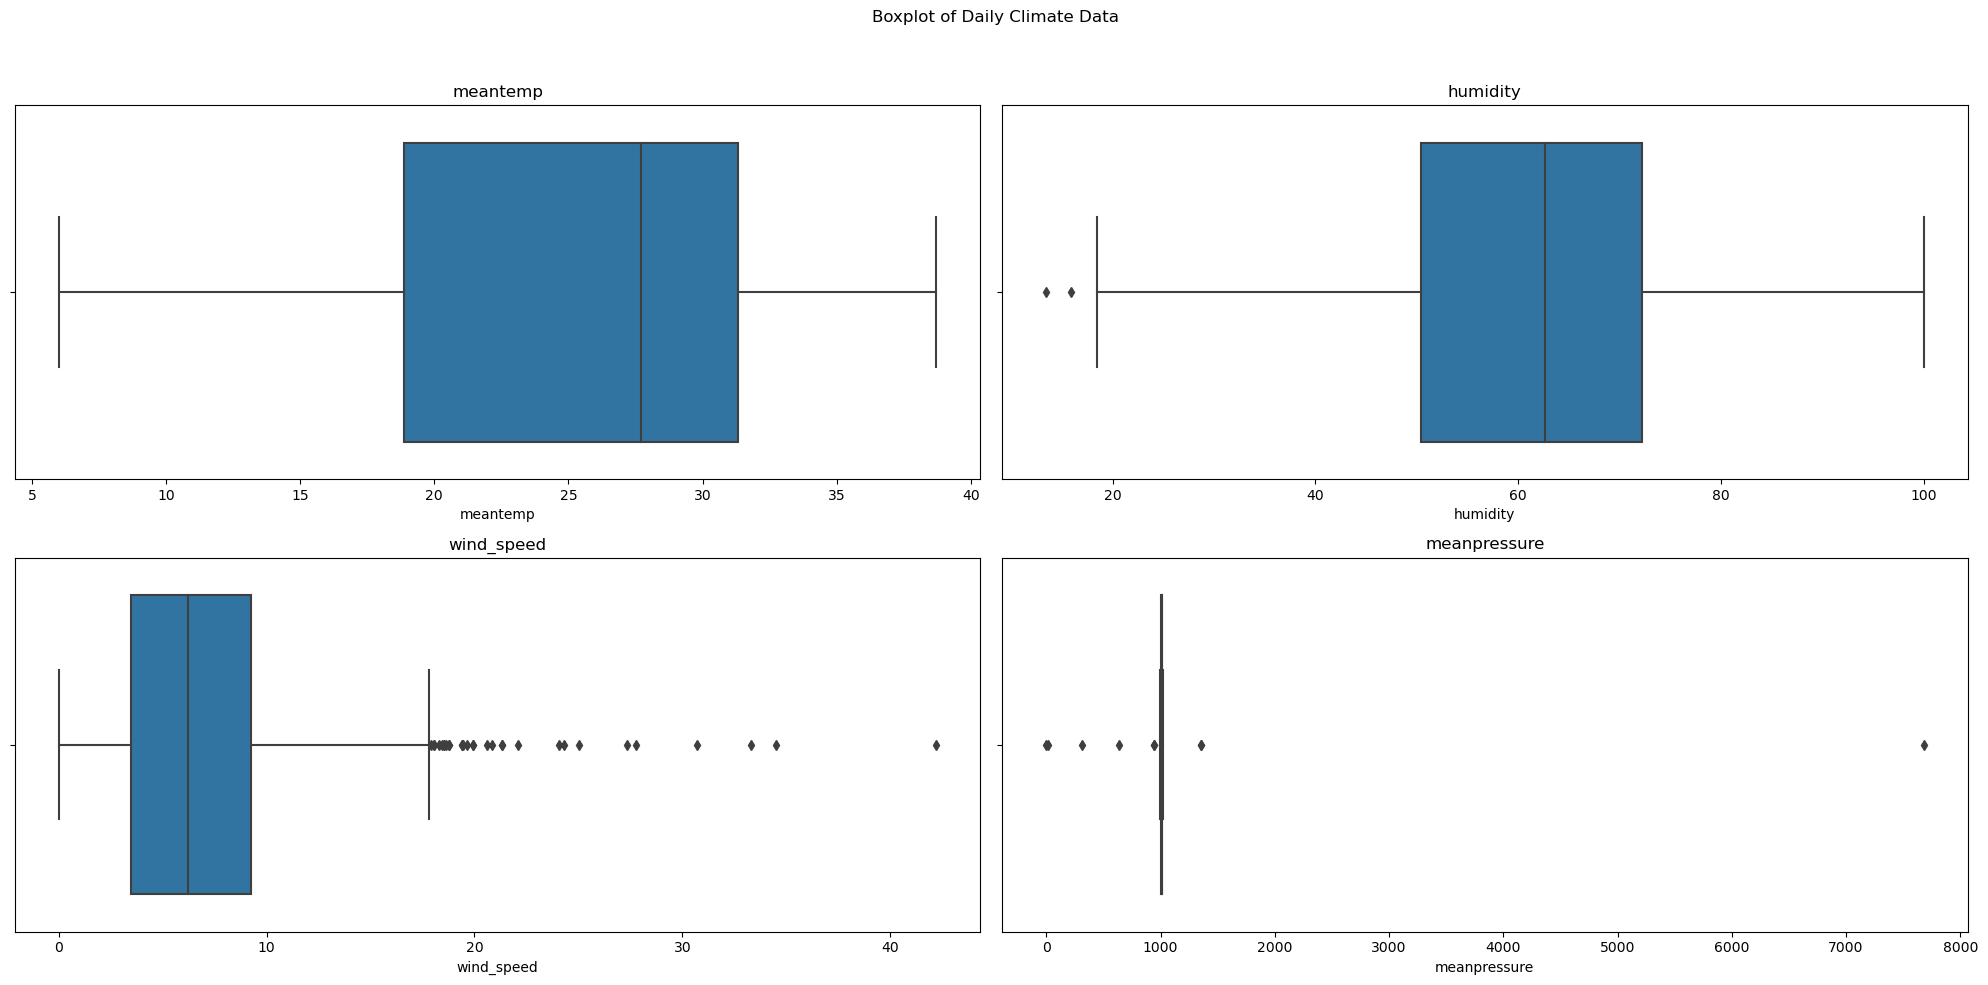

In [70]:
# boxplot
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Boxplot of Daily Climate Data')

columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for ax, col in zip(axes.flat, columns):
    sns.boxplot(x=train[col], ax=ax)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [71]:
import plotly.express as px

fig = px.line(train, x='date', y='meanpressure', title='Mean Pressure over Time')
fig.show()

In [72]:
import plotly.express as px

normalised_train = train.copy()
normalised_train['meanpressure'] = (train['meanpressure'] - train['meanpressure'].mean()) / train['meanpressure'].std()
normalised_train['humidity'] = (train['humidity'] - train['humidity'].mean()) / train['humidity'].std()
normalised_train['wind_speed'] = (train['wind_speed'] - train['wind_speed'].mean()) / train['wind_speed'].std()
normalised_train['meantemp'] = (train['meantemp'] - train['meantemp'].mean()) / train['meantemp'].std()

fig = px.line(normalised_train, x='date', y=['meantemp', 'humidity', 'wind_speed'], title='Climate Data over Time')
fig.show()

In [73]:
# split date into year, month, day
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

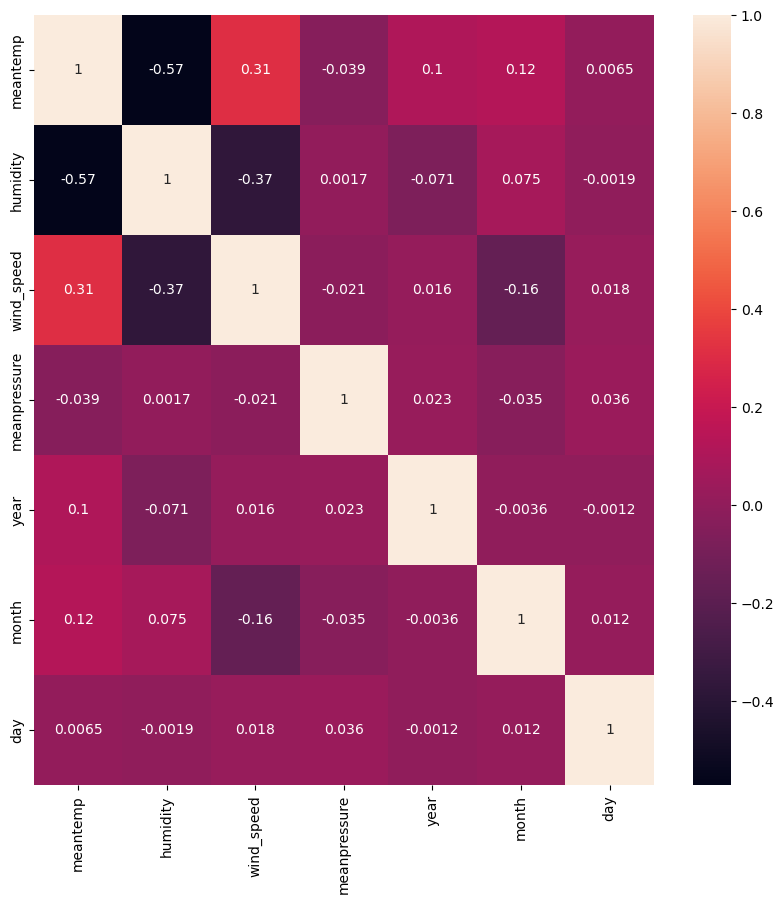

In [74]:
# heatmap correlation
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, ax=ax)
plt.show()

# Modeling

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tr_data = train[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month', 'day']]
te_data = test[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month', 'day']]
tr_data = scaler.fit_transform(tr_data)
te_data = scaler.transform(te_data)

In [87]:
import numpy as np

def create_dataset(data, lookBack):
    X, Y = [], []
    for i in range(len(data) - lookBack):
        X.append(data[i:(i + lookBack), 1:])
        Y.append(data[i + lookBack, 0])
    return np.array(X), np.array(Y)

look_back = 60
X_train, Y_train = create_dataset(tr_data, lookBack=look_back)
X_test, Y_test = create_dataset(te_data, lookBack=look_back)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1402, 60, 6) (1402,) (54, 60, 6) (54,)


In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 50)            11400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31651 (123.64 KB)
Trainable params: 31651 (123.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
model.fit(X_train, Y_train, epochs=25, batch_size=32)

Epoch 1/25
44/44 [==============================] - 3s 22ms/step - loss: 0.0851
Epoch 2/25
44/44 [==============================] - 1s 21ms/step - loss: 0.0197
Epoch 3/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0124
Epoch 4/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0113
Epoch 5/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0099
Epoch 6/25
44/44 [==============================] - 1s 19ms/step - loss: 0.0095
Epoch 7/25
44/44 [==============================] - 1s 22ms/step - loss: 0.0081
Epoch 8/25
44/44 [==============================] - 1s 21ms/step - loss: 0.0078
Epoch 9/25
44/44 [==============================] - 1s 23ms/step - loss: 0.0087
Epoch 10/25
44/44 [==============================] - 1s 21ms/step - loss: 0.0075
Epoch 11/25
44/44 [==============================] - 1s 22ms/step - loss: 0.0075
Epoch 12/25
44/44 [==============================] - 1s 21ms/step - loss: 0.0076
Epoch 13/25
44/44 [==================

In [90]:
predicted = model.predict(X_test)
predicted = np.hstack((predicted, np.zeros((predicted.shape[0], 6))))
predicted = scaler.inverse_transform(predicted)
predicted = predicted[:, 0]

predicted

2/2 [==============================] - 0s 7ms/step


array([25.29770531, 25.47506254, 25.72735923, 25.97146623, 26.23536691,
       26.50111417, 26.77951838, 26.97851196, 27.03046377, 27.09651938,
       27.22375578, 27.40473402, 27.66354735, 27.85109098, 28.0501723 ,
       28.28369513, 28.41493472, 28.64911077, 28.82335592, 28.95763935,
       29.12971423, 29.33397261, 29.47457183, 29.73187982, 29.95782329,
       30.20499558, 30.41906987, 30.58685883, 30.81453188, 30.99657088,
       31.15199732, 31.27052146, 31.44017455, 31.61846384, 31.78096655,
       31.78604415, 32.00130595, 32.16250611, 32.34884469, 32.63343211,
       32.94462818, 33.25501698, 33.4570115 , 33.60368863, 33.63506875,
       33.74237108, 33.78411504, 33.78282419, 33.89742119, 34.04282503,
       34.13240061, 34.09086529, 34.03120933, 34.11930297])

In [91]:
Y_test = Y_test.reshape(-1, 1)
Y_test = np.hstack((Y_test, np.zeros((Y_test.shape[0], 6))))
Y_test = scaler.inverse_transform(Y_test)
Y_test = Y_test[:, 0]

Y_test

array([23.75      , 20.5       , 19.125     , 19.75      , 20.        ,
       22.625     , 21.54545455, 20.78571429, 19.9375    , 18.53333333,
       17.375     , 17.44444444, 18.        , 19.875     , 24.        ,
       20.9       , 24.69230769, 24.66666667, 23.33333333, 25.        ,
       27.25      , 28.        , 28.91666667, 26.5       , 29.1       ,
       29.5       , 29.88888889, 31.        , 29.28571429, 30.625     ,
       31.375     , 29.75      , 30.5       , 30.93333333, 29.23076923,
       31.22222222, 27.        , 25.625     , 27.125     , 27.85714286,
       29.25      , 29.25      , 29.66666667, 30.5       , 31.22222222,
       31.        , 32.55555556, 34.        , 33.5       , 34.5       ,
       34.25      , 32.9       , 32.875     , 32.        ])

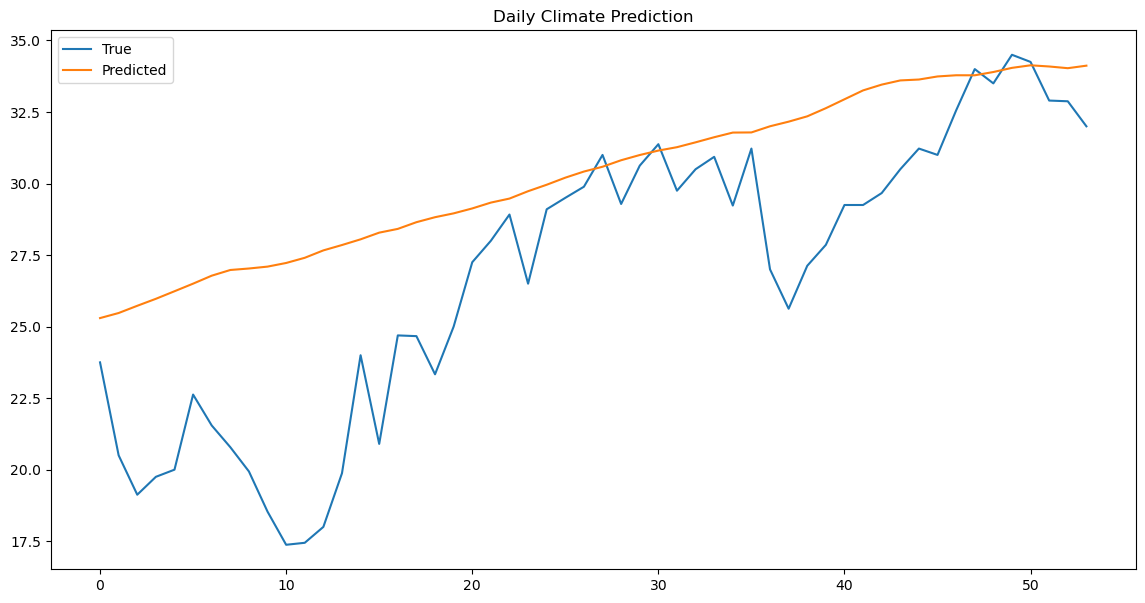

In [92]:
# plot the results
plt.figure(figsize=(14, 7))
plt.plot(Y_test, label='True')
plt.plot(predicted, label='Predicted')
plt.title('Daily Climate Prediction')
plt.legend()
plt.show()

In [95]:
import plotly.express as px

fig = px.line(test, x='date', y='meantemp', title='Mean Temperature over Time')
fig.show()
